In [21]:
import pandas as pd # Data manipulation and analysis
import numpy as np # Arrays and matrices
from datetime import datetime # Manipulating dates and times
import math

# Data visualization
import matplotlib.pyplot as plt # Combine pyplot with numpy into a single namespace
import matplotlib as mpl
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

# Style from fivethityeight website
mpl.rcdefaults() 
plt.style.use('fivethirtyeight')
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams.update({'font.size': 16})

from sklearn.ensemble import RandomForestRegressor

# Same random numbers (debug mode)
np.random.seed(238746)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [22]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [23]:
# Normalization
def nor_data(df):
    return (df - df.mean()) / df.std()

In [24]:
# Open dataset from .csv file, with index column as date (first unnamed column in the file)
dataset = pd.read_csv('data/step2.csv', index_col=0, parse_dates=[0])
dataset.head()

sku   pack    size   brand  price  exposed       promo    sales  \
date                                                                          
2016-12-10  144  MULTI  114.23  BRAND2   2.18     45.0  100.000000  51320.0   
2016-12-17  144  MULTI  114.23  BRAND2   2.00     45.0  100.000000  51320.0   
2016-12-24  144  MULTI  114.23  BRAND2   2.05     17.0  100.000000  66431.0   
2016-12-31  144  MULTI  114.23  BRAND2   3.00      2.0  100.000000  57001.0   
2017-01-07  144  MULTI  114.23  BRAND2   2.99      2.0   28.534193  15052.0   

            scope   target       nor  cluster  
date                                           
2016-12-10      1  51320.0  0.291411        1  
2016-12-17      1  66431.0  0.291411        1  
2016-12-24      1  57001.0  0.818564        1  
2016-12-31      1  15052.0  0.489595        1  
2017-01-07      1  22016.0 -0.973811        1

# Visualize the relationship between the features

In [25]:
def all_nor(cluster=1):
    df = pd.DataFrame(columns=dataset.columns.values)
    for skuId in dataset[dataset.cluster == cluster].sku.unique():
        df_nor = dataset[dataset.sku == skuId]
        df_nor['exposed'] = nor_data(df_nor.exposed)
        df_nor['promo'] = nor_data(df_nor.promo)
        df_nor['sales'] = nor_data(df_nor.sales)
        df_nor['price'] = nor_data(df_nor.price)
        df_nor['target'] = nor_data(df_nor.target)
        df = df.append(df_nor)
    return df

In [26]:
cluster1_nor = all_nor(cluster=1)
cluster2_nor = all_nor(cluster=2)

In [27]:
cluster1_nor['sales-exposed'] = cluster1_nor.sales / cluster1_nor.exposed
cluster1_nor['sales-promo'] = cluster1_nor.sales / cluster1_nor.promo
cluster1_nor['sales-price'] = cluster1_nor.sales / cluster1_nor.price
cluster1_nor['price-sales'] = cluster1_nor.price / cluster1_nor.sales
cluster1_nor['price-target'] = cluster1_nor.price / cluster1_nor.target
cluster1_nor['target-price'] = cluster1_nor.target / cluster1_nor.price
cluster1_nor['target-min-price'] = np.abs(cluster1_nor.target) / np.abs(cluster1_nor.price)

In [28]:
cluster2_nor['sales-exposed'] = cluster2_nor.sales / cluster2_nor.exposed
cluster2_nor['sales-promo'] = cluster2_nor.sales / cluster2_nor.promo
cluster2_nor['sales-price'] = cluster2_nor.sales / cluster2_nor.price
cluster2_nor['price-sales'] = cluster2_nor.price / cluster2_nor.sales
cluster2_nor['price-target'] = cluster2_nor.price / cluster2_nor.target
cluster2_nor['target-price'] = cluster2_nor.target / cluster2_nor.price
cluster2_nor['target-min-price'] = np.abs(cluster2_nor.target) / np.abs(cluster2_nor.price)

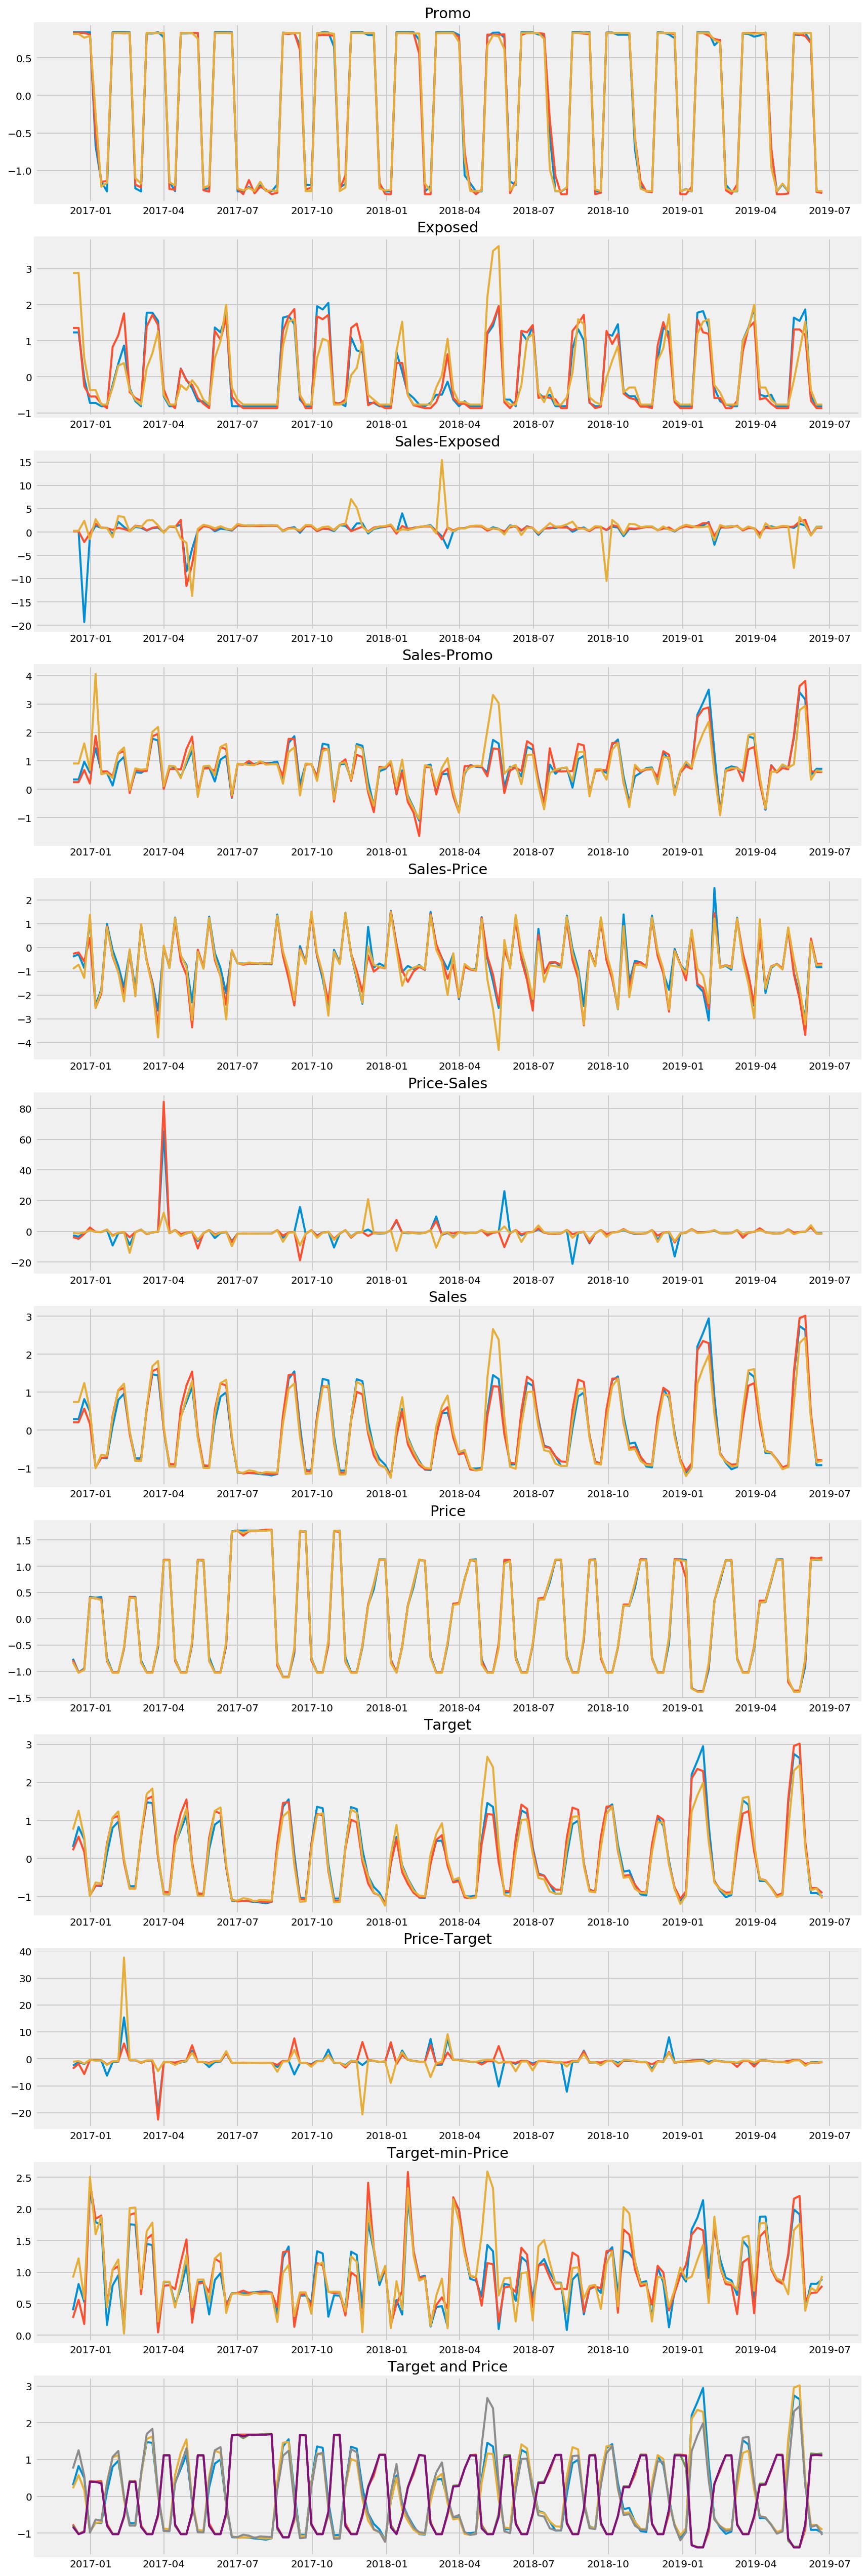

In [29]:
fig, a = plt.subplots(12, 1, figsize=(13, 46))
for skuId in cluster1_nor.sku.unique():
    df = cluster1_nor[cluster1_nor.sku == skuId]
    a[0].plot(df.promo)
    a[0].set_title('Promo')
    a[1].plot(df.exposed)
    a[1].set_title('Exposed')
    a[2].plot(df['sales-exposed'])
    a[2].set_title('Sales-Exposed')
    a[3].plot(df['sales-promo'])
    a[3].set_title('Sales-Promo')
    a[4].plot(df['sales-price'])
    a[4].set_title('Sales-Price')
    a[5].plot(df['price-sales'])
    a[5].set_title('Price-Sales')
    a[6].plot(df.sales)
    a[6].set_title('Sales')
    a[7].plot(df.price)
    a[7].set_title('Price')
    a[8].plot(df.target)
    a[8].set_title('Target')
    a[9].plot(df['price-target'])
    a[9].set_title('Price-Target')
    a[10].plot(df['target-min-price'])
    a[10].set_title('Target-min-Price')
    #a[11].plot(df['target-price'])
    a[11].plot(df.target)
    a[11].plot(df.price)
    a[11].set_title('Target and Price')

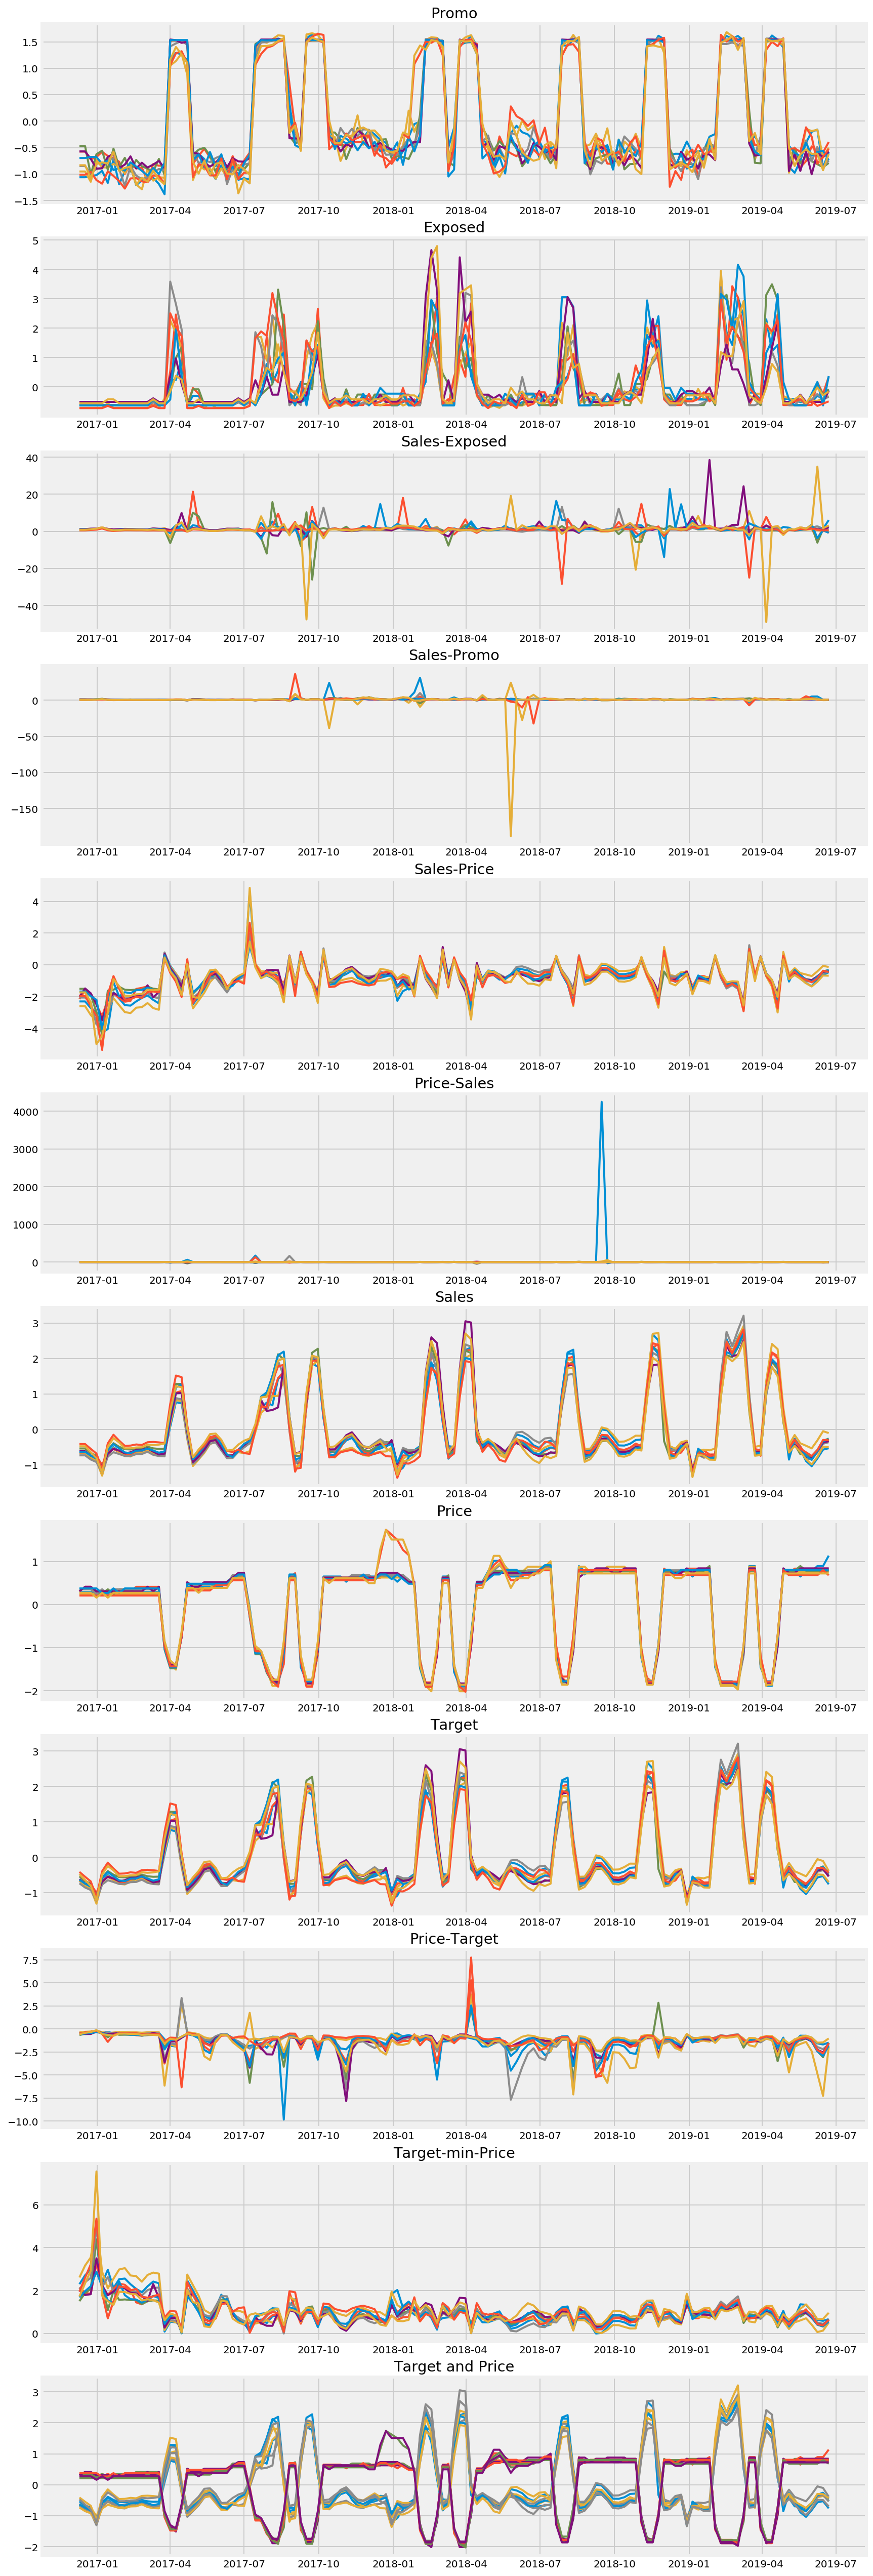

In [30]:
fig, a = plt.subplots(12, 1, figsize=(13, 46))
for skuId in cluster2_nor.sku.unique():
    df = cluster2_nor[cluster2_nor.sku == skuId]
    a[0].plot(df.promo)
    a[0].set_title('Promo')
    a[1].plot(df.exposed)
    a[1].set_title('Exposed')
    a[2].plot(df['sales-exposed'])
    a[2].set_title('Sales-Exposed')
    a[3].plot(df['sales-promo'])
    a[3].set_title('Sales-Promo')
    a[4].plot(df['sales-price'])
    a[4].set_title('Sales-Price')
    a[5].plot(df['price-sales'])
    a[5].set_title('Price-Sales')
    a[6].plot(df.sales)
    a[6].set_title('Sales')
    a[7].plot(df.price)
    a[7].set_title('Price')
    a[8].plot(df.target)
    a[8].set_title('Target')
    a[9].plot(df[np.abs(df['price-target']) < 10]['price-target'])
    a[9].set_title('Price-Target')
    a[10].plot(df['target-min-price'])
    a[10].set_title('Target-min-Price')
    #a[11].plot(df['target-price'])
    a[11].plot(df.target)
    a[11].plot(df.price)
    a[11].set_title('Target and Price')

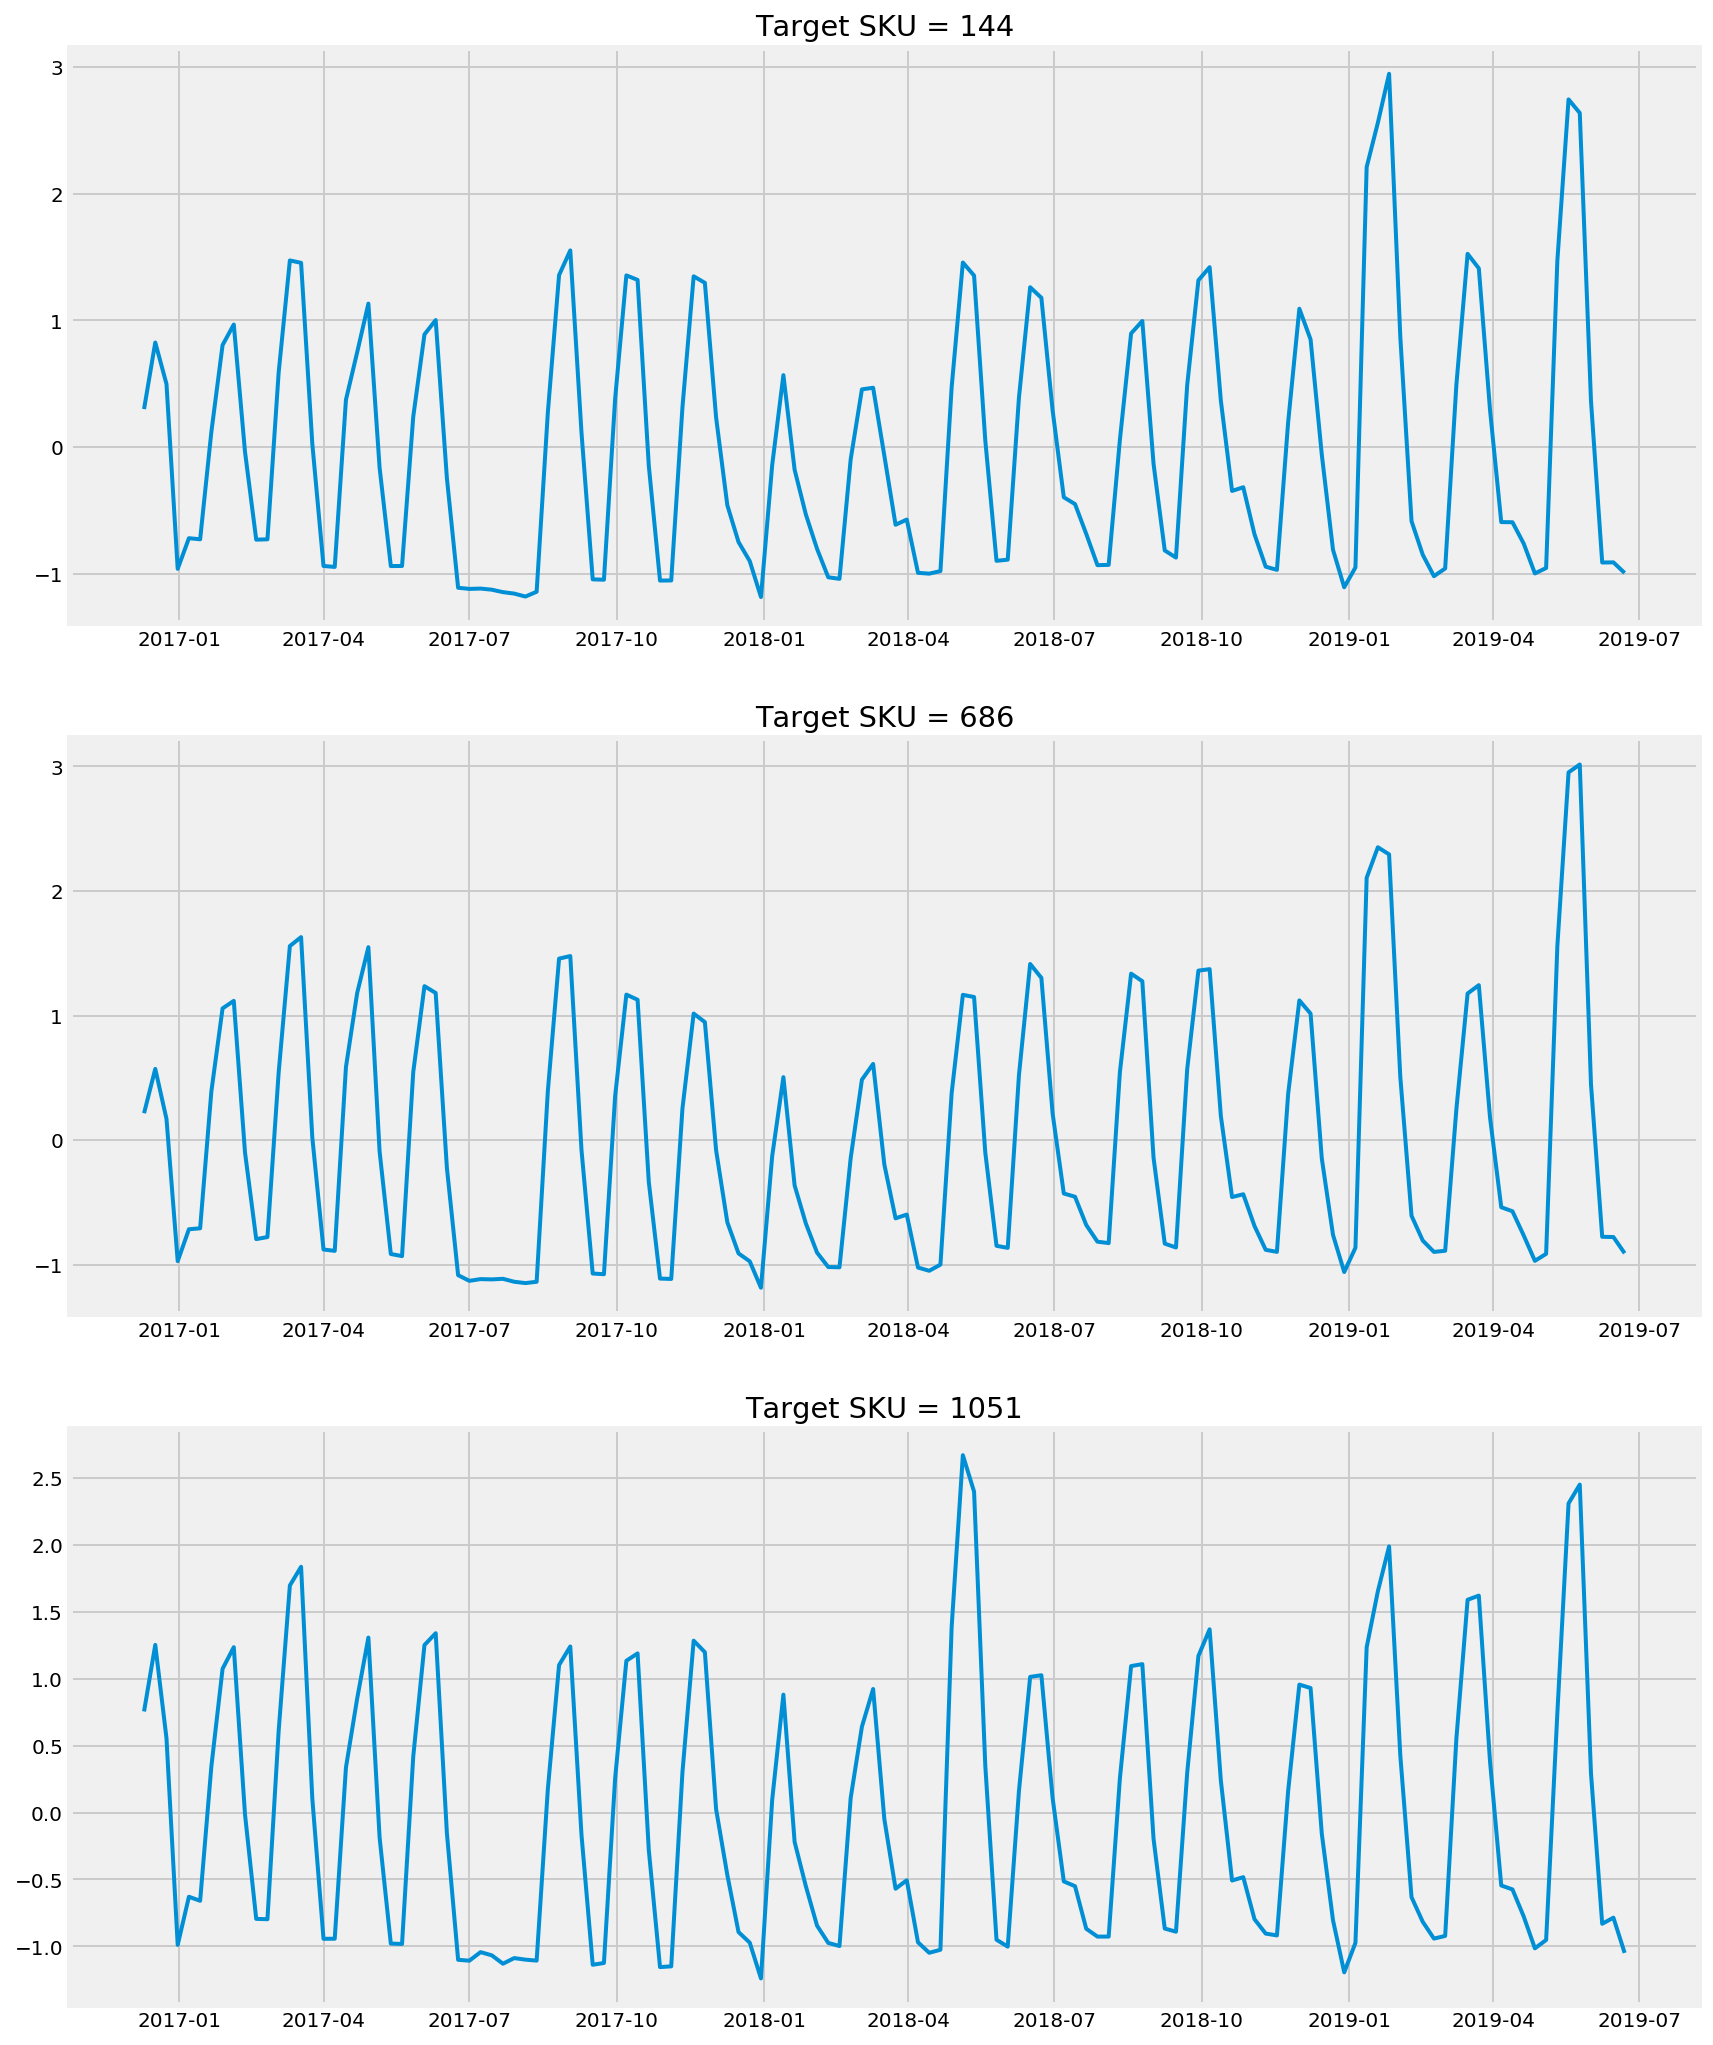

In [31]:
fig, a = plt.subplots(len(cluster1_nor.sku.unique()), 1, figsize=(13, 18))
i = 0
for skuId in cluster1_nor.sku.unique():
    df = cluster1_nor[cluster1_nor.sku == skuId]
    a[i].plot(df.target)
    a[i].set_title('Target SKU = {}'.format(skuId))
    i = i + 1

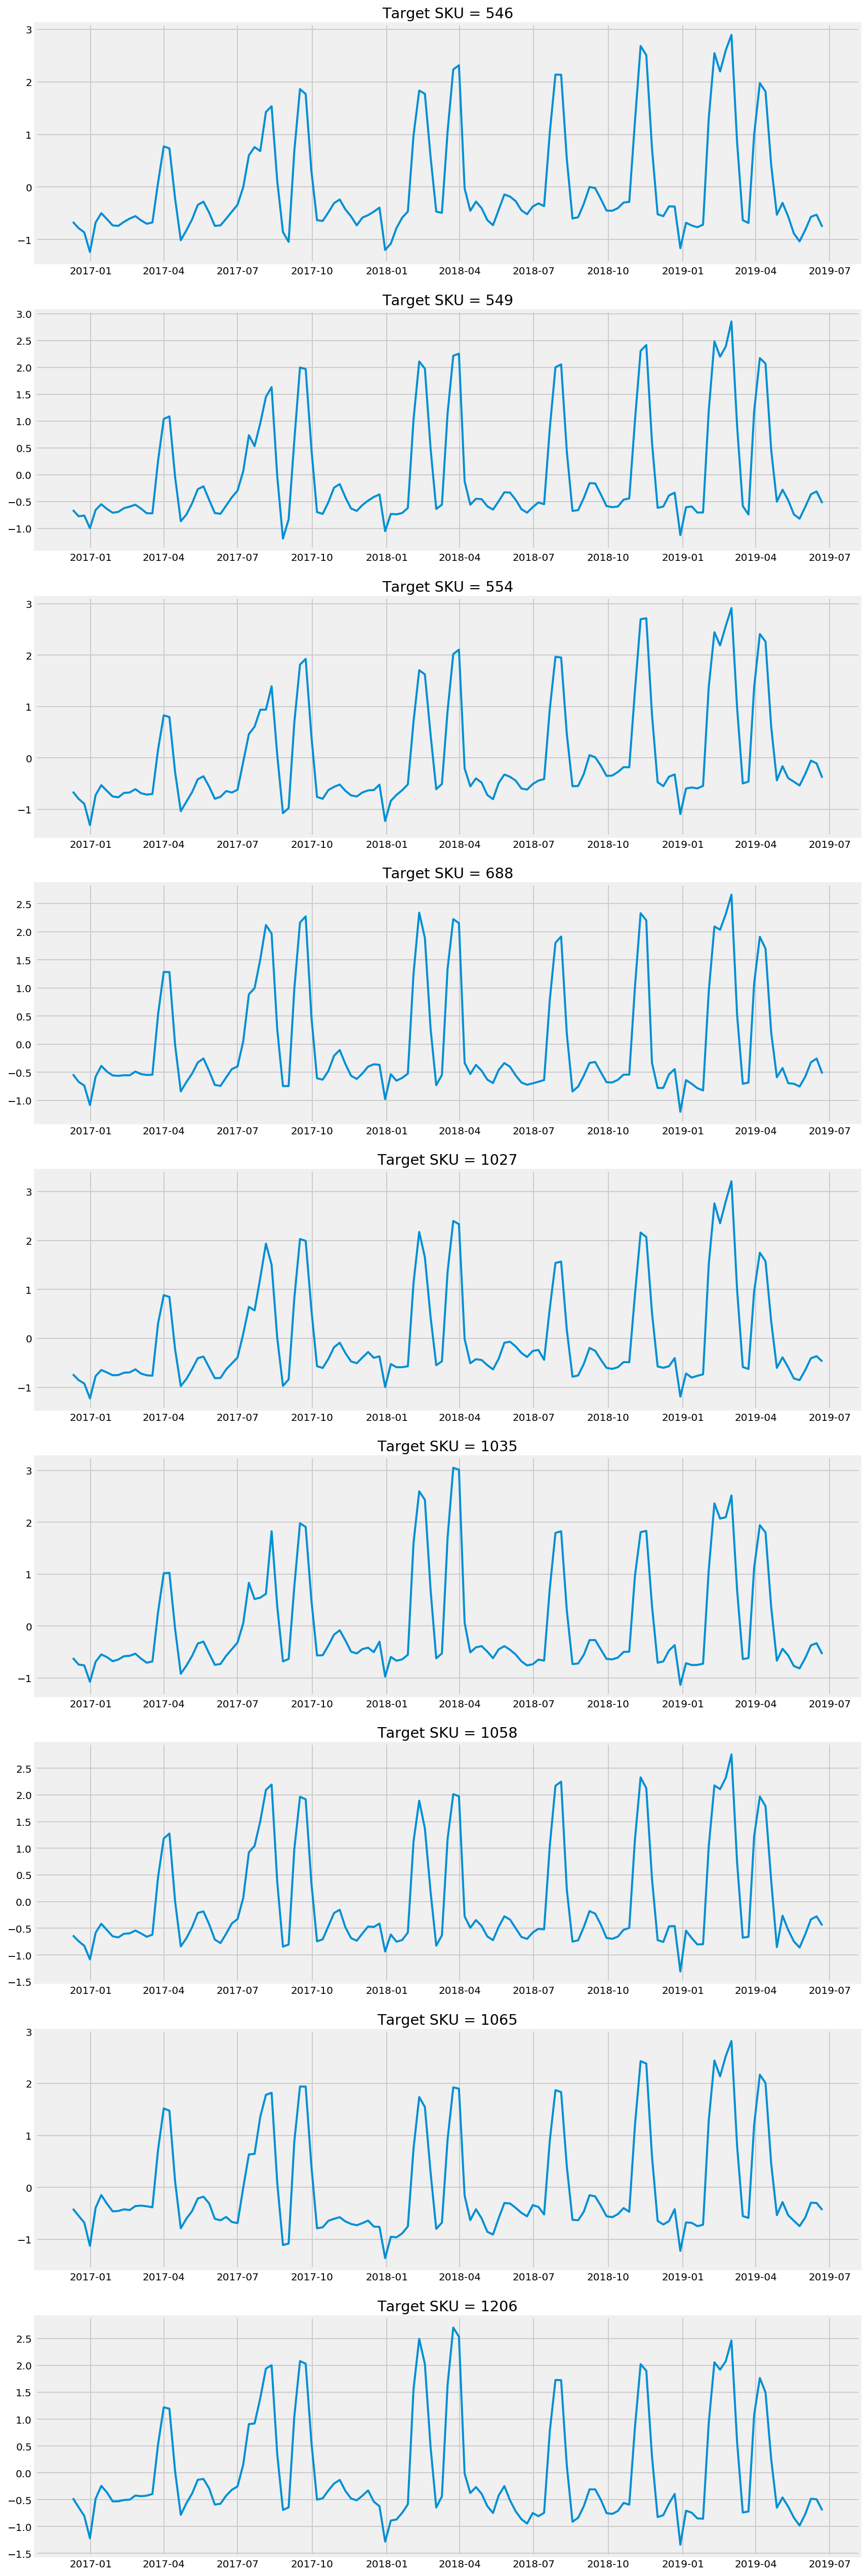

In [32]:
fig, a = plt.subplots(len(cluster2_nor.sku.unique()), 1, figsize=(13, 46))
i = 0
for skuId in cluster2_nor.sku.unique():
    df = cluster2_nor[cluster2_nor.sku == skuId]
    a[i].plot(df.target)
    a[i].set_title('Target SKU = {}'.format(skuId))
    i = i + 1